In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('demo01.csv') 
print(df.head())

  sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0    M                Y               Y           0               Working   
1    F                N               Y           0  Commercial associate   
2    F                N               Y           0  Commercial associate   
3    M                Y               Y           0               Working   
4    F                Y               N           0               Working   

                        educacao          estado_civil    tipo_residencia  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education               Married  House / apartment   
4              Incomplete higher               Married  House / apartment   

       idade  tempo_emprego  possui_celular  possui_fone_comercial  \
0  5

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [4]:
print(df.isnull().sum())

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64


In [5]:
print("\nDistribuição da variável resposta 'mau':")
print(df['mau'].value_counts(normalize=True))


Distribuição da variável resposta 'mau':
mau
False    0.976577
True     0.023423
Name: proportion, dtype: float64


2) Vamos montar um metadados

In [6]:
df_info = pd.DataFrame({
    'variavel': df.columns,
    'tipo_dado': df.dtypes.values
})

In [7]:
qtd_categorias = []

In [8]:
for coluna in df.columns:
    qtd_categorias.append(df[coluna].nunique())

In [9]:
df_info['qtd_categorias'] = qtd_categorias

In [10]:
print(df_info)

                 variavel tipo_dado  qtd_categorias
0                    sexo    object               2
1        posse_de_veiculo    object               2
2         posse_de_imovel    object               2
3              qtd_filhos     int64               8
4              tipo_renda    object               5
5                educacao    object               5
6            estado_civil    object               5
7         tipo_residencia    object               6
8                   idade   float64            5298
9           tempo_emprego   float64            3005
10         possui_celular     int64               1
11  possui_fone_comercial     int64               2
12            possui_fone     int64               2
13           possui_email     int64               2
14  qt_pessoas_residencia   float64               9
15                    mau      bool               2


3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [11]:
variaveis_qualitativas = df.select_dtypes(include=['object']).columns
print("Variáveis qualitativas identificadas:", variaveis_qualitativas)

Variáveis qualitativas identificadas: Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia'],
      dtype='object')


In [12]:
df_dummies = pd.get_dummies(df, columns=variaveis_qualitativas, drop_first=True)

In [13]:
variaveis_str = df.select_dtypes(include=['object']).columns
df_final = df_dummies.drop(columns=variaveis_str, errors='ignore')

In [14]:
print("\nDataFrame final com variáveis numéricas:")
print(df_final.head())


DataFrame final com variáveis numéricas:
   qtd_filhos      idade  tempo_emprego  possui_celular  \
0           0  58.832877       3.106849               1   
1           0  52.356164       8.358904               1   
2           0  52.356164       8.358904               1   
3           0  46.224658       2.106849               1   
4           0  29.230137       3.021918               1   

   possui_fone_comercial  possui_fone  possui_email  qt_pessoas_residencia  \
0                      0            0             0                    2.0   
1                      0            1             1                    1.0   
2                      0            1             1                    1.0   
3                      1            1             1                    2.0   
4                      0            0             0                    2.0   

     mau  sexo_M  ...  educacao_Secondary / secondary special  \
0  False    True  ...                                    True   
1  F

In [15]:
cross_email = pd.crosstab(df['possui_email'], df['mau'], normalize='index')
print("Tabela cruzada para 'possui_email' e 'mau':")
print(cross_email)

Tabela cruzada para 'possui_email' e 'mau':
mau              False     True 
possui_email                    
0             0.976269  0.023731
1             0.979730  0.020270


In [16]:
cross_veiculo = pd.crosstab(df['posse_de_veiculo'], df['mau'], normalize='index')
print("\nTabela cruzada para 'posse_de_veiculo' e 'mau':")
print(cross_veiculo)


Tabela cruzada para 'posse_de_veiculo' e 'mau':
mau                  False     True 
posse_de_veiculo                    
N                 0.975732  0.024268
Y                 0.977905  0.022095


In [17]:
df_final.to_csv('demo01_processada.csv', index=False)
print("Base de dados salva como 'demo01_processada.csv'.")

Base de dados salva como 'demo01_processada.csv'.


Módulo 07 - Tarefa 02

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [36]:
X = df.drop('mau', axis=1)  # Variáveis explicativas
y = df['mau']  

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
print(f'Tamanho do conjunto de treino: {X_train.shape}')
print(f'Tamanho do conjunto de validação: {X_test.shape}')

Tamanho do conjunto de treino: (11655, 28)
Tamanho do conjunto de validação: (4995, 28)


In [39]:
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

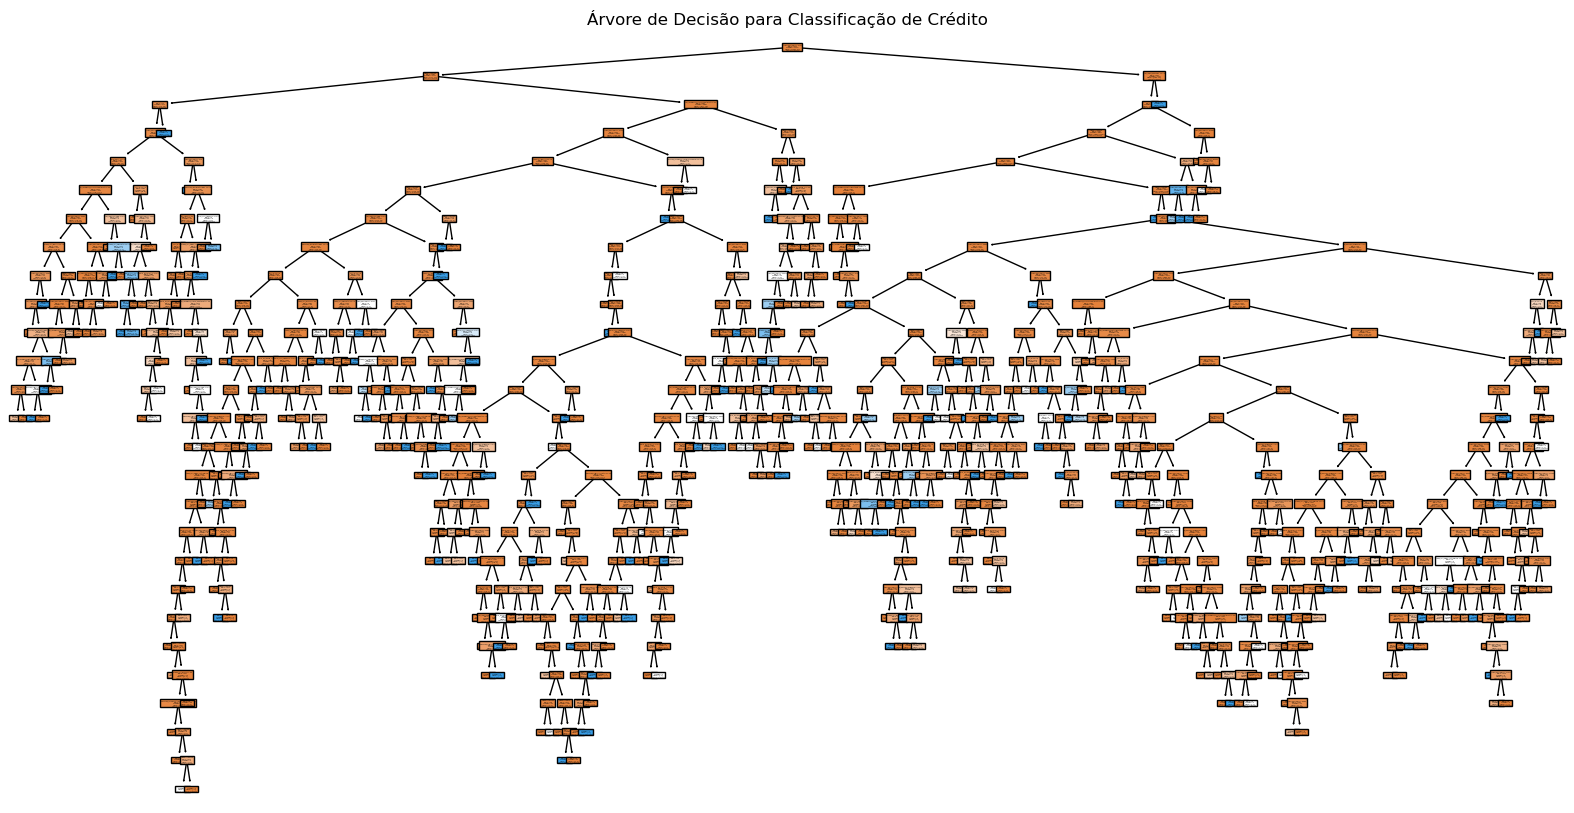

In [40]:
plt.figure(figsize=(20, 10))
tree.plot_tree(modelo_arvore, filled=True, feature_names=X.columns, class_names=["aprovados", "reprovados"])
plt.title("Árvore de Decisão para Classificação de Crédito")
plt.show()

In [41]:
y_train_pred = modelo_arvore.predict(X_train)

In [42]:
conf_matrix = confusion_matrix(y_train, y_train_pred)

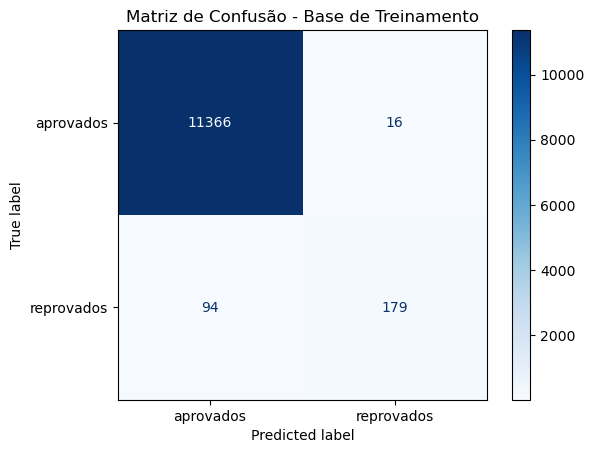

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["aprovados", "reprovados"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Base de Treinamento")
plt.show()

In [44]:
acuracia_treino = accuracy_score(y_train, y_train_pred)
print(f"Acurácia na base de treinamento: {acuracia_treino:.2%}")

Acurácia na base de treinamento: 99.06%


In [45]:
y_test_pred = modelo_arvore.predict(X_test)

In [46]:
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

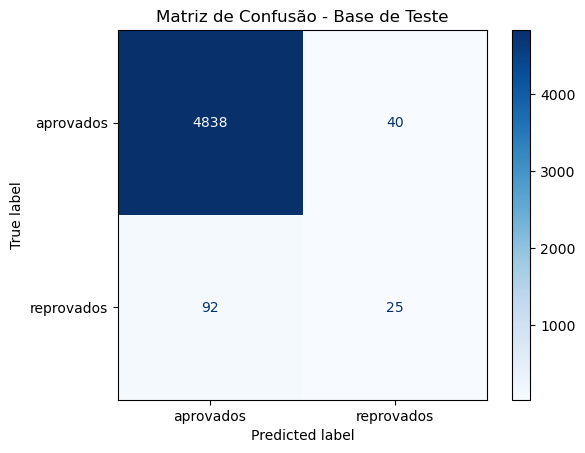

In [47]:
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=["aprovados", "reprovados"])
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Base de Teste")
plt.show()

In [48]:
acuracia_teste = accuracy_score(y_test, y_test_pred)
print(f"Acurácia na base de teste: {acuracia_teste:.2%}")

Acurácia na base de teste: 97.36%


In [49]:
print(f"Acurácia na base de treinamento: {acuracia_treino:.2%}")
print(f"Variação de acurácia: {(acuracia_treino - acuracia_teste):.2%}")

Acurácia na base de treinamento: 99.06%
Variação de acurácia: 1.70%


In [50]:
modelo_arvore_restrita = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo_arvore_restrita.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [51]:
y_test_pred_restrita = modelo_arvore_restrita.predict(X_test)

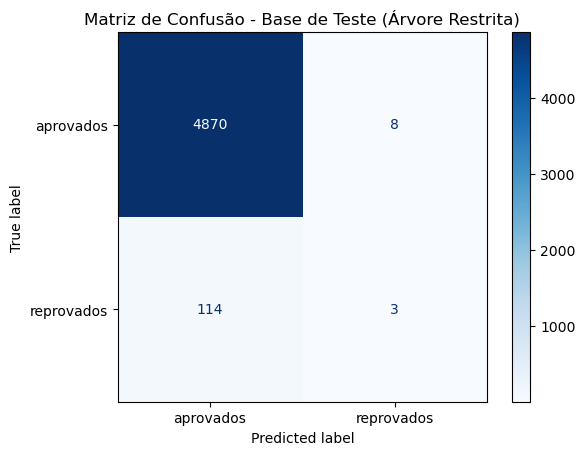

In [52]:
conf_matrix_test_restrita = confusion_matrix(y_test, y_test_pred_restrita)
disp_test_restrita = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test_restrita, display_labels=["aprovados", "reprovados"])
disp_test_restrita.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Base de Teste (Árvore Restrita)")
plt.show()


In [53]:
proporcao_maus = sum(y_test_pred_restrita == 1) / len(y_test_pred_restrita)
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus:.2%}")

Proporção de proponentes classificados como 'maus': 0.22%


In [54]:
y_test_pred_todos_bons = [0] * len(y_test)

In [56]:
acuracia_todos_bons = accuracy_score(y_test, y_test_pred_todos_bons)

In [57]:
print(f"Acurácia classificando todos os contratos como 'bons': {acuracia_todos_bons:.2%}")

Acurácia classificando todos os contratos como 'bons': 97.66%
